# Stock price prediction using LSTM
LSTM (Long Short-Term Memory) is a type of Recurrent Neural Network (RNN) architecture designed to handle sequence data and overcome the limitations of traditional RNNs. Will predict stock Price of AAPL(Apple) using LSTM.

* **1.) Explore change in price of the stock over time**
* **2.) Explore the daily return of the stock on average**
* **3.) Check the moving average of the various stocks**
* **4.) Check the correlation between different stocks**
* **5.) Evaluate the value at risk by investing in a particular stock**
* **6.) Predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)**

# **Step 1 - Importing the libraries**

**Configuration Libraries**

In [1]:
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

**Common Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

**Machine Learning Libraries**

In [3]:
from sklearn.metrics import *
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
# from keras.preprocessing.sequence import TimeseriesGenerator

**Stock API**

* **Here we are using yfinance: https://pypi.org/project/yfinance/**
* **Ticker symbol docs: https://www.nasdaq.com/market-activity/stocks/screener**

In [6]:
!pip install yfinance
import yfinance as yf

**Grabbing data from YFINANCE**

In [7]:
data = yf.Ticker("AAPL") # For Apple stock

In [8]:
hist = data.history(period = "1mo")

In [9]:
data.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

**Converting values into dataframe**

In [10]:
current_date = datetime.now()
start_date = datetime(current_date.year - 1, current_date.month, current_date.day)

data = yf.download("AAPL", start_date, current_date)

[*********************100%***********************]  1 of 1 completed


**Data**

In [11]:
data.head()
data.columns = [f"{col[0]}" for col in data.columns]

In [12]:
data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-12-29,191.591385,192.529999,194.399994,191.729996,193.899994,42628800
2024-01-02,184.734985,185.639999,188.440002,183.889999,187.149994,82488700
2024-01-03,183.351746,184.250000,185.880005,183.429993,184.220001,58414500
2024-01-04,181.023163,181.910004,183.089996,180.880005,182.149994,71983600
2024-01-05,180.296722,181.179993,182.759995,180.169998,181.990005,62303300


In [13]:
data.tail()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-12-20,254.490005,254.490005,255.000000,245.690002,248.039993,147495300
2024-12-23,255.270004,255.270004,255.649994,253.449997,254.770004,40858800
2024-12-24,258.200012,258.200012,258.209991,255.289993,255.490005,23234700
2024-12-26,259.019989,259.019989,260.100006,257.630005,258.190002,27237100
2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42317100


**Visualizing the data columns to get a better overview**

In [14]:
fig = px.line(data, x=data.index, y="Close", title='Apple Closing Prices')
fig.show()

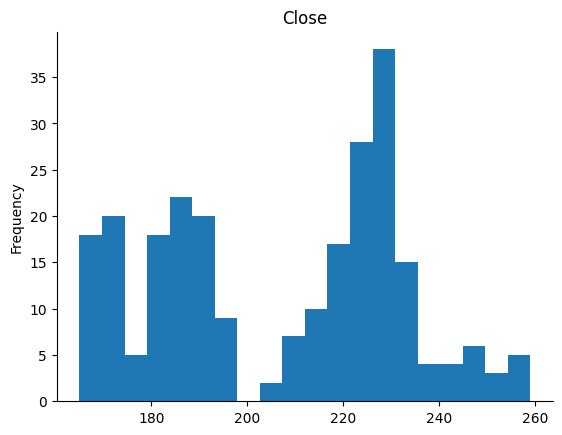

In [15]:
# @title Histogram on Close price

from matplotlib import pyplot as plt
data['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

<hr>

**Data Information**

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-12-29 to 2024-12-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  251 non-null    float64
 1   Close      251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Open       251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


* **Need to work with the date columns**
* **Moreover, on the weekends since the markets are closed, hence we need to check for that as well.**

**Data Description**

In [17]:
data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,206.354701,206.796016,208.498088,204.805140,206.538725,5.722558e+07
std,25.471536,25.261223,25.334644,24.872078,25.067119,3.085777e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,2.323470e+07
25%,183.418907,184.199997,185.119995,182.180000,183.735001,4.198310e+07
50%,213.617462,214.100006,216.750000,211.600006,213.850006,4.994790e+07
75%,227.008553,227.274994,229.175003,225.025002,227.235001,6.295815e+07
max,259.019989,259.019989,260.100006,257.630005,258.190002,3.186799e+08


# **Step 2 - Information on Closing Prices**

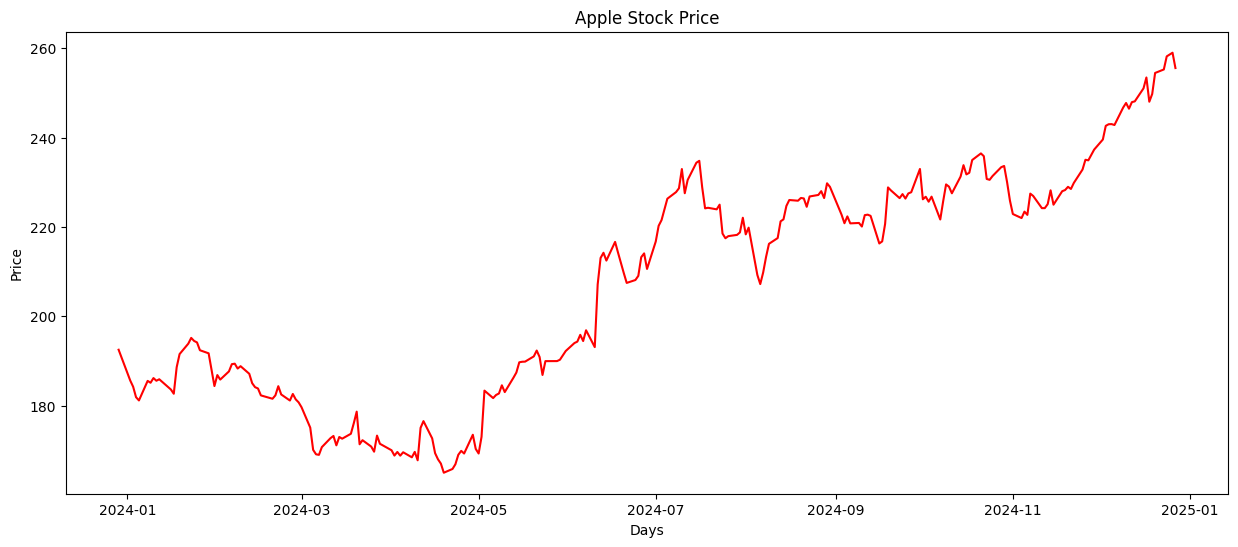

In [18]:
plt.figure(figsize=(15,6))
plt.plot(data.Close, color = "red")
plt.title("Apple Stock Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

# **Step 3 - Information on the volumn of the assest sold**
  * **It is the number / quantity of assests sold or traded between daily open and close**

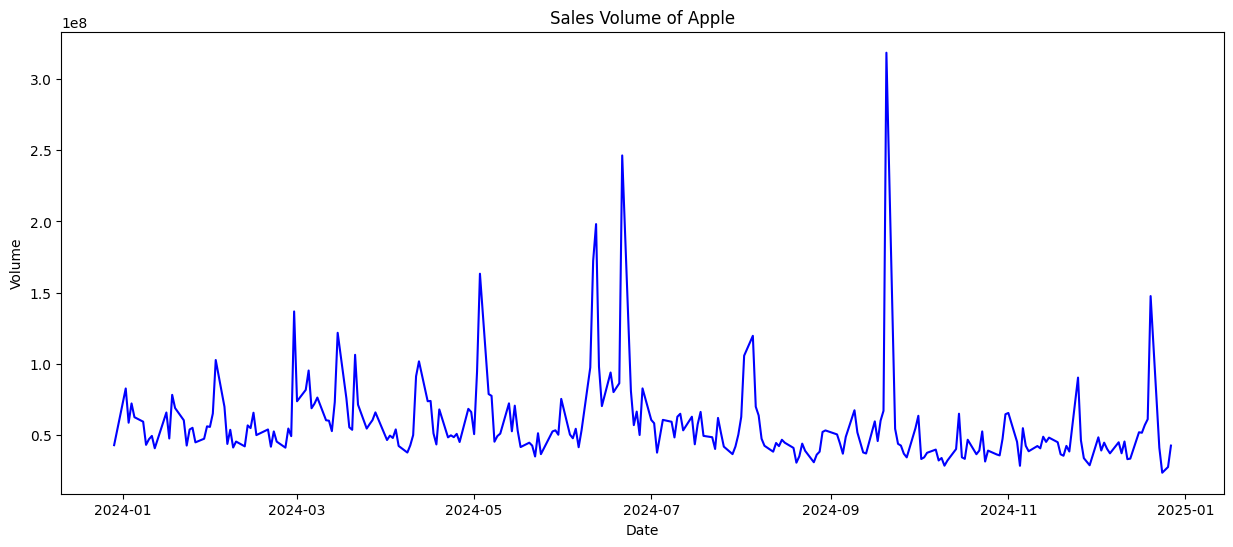

In [19]:
plt.figure(figsize=(15,6))
plt.plot(data.Volume, color = "blue")
plt.title("Sales Volume of Apple")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

<hr>

# **Step 4 - Working with Moving Average**
  * **This will help us find out the updates that were done according to the specified timeframe**

**Finding the MA for the data**

In [20]:
moving_average = [10, 20, 50]

for x in moving_average:
  column_name = f"MA for {x} days"
  data[column_name] = data["Close"].rolling(window = x).mean()

**Visualizing the same**

In [21]:
fig = px.line(data, x=data.index, y=["Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"],
              title="Moving Average for Apple Closing Prices")
fig.show()


**Based on the graph we can say**
  * **The MA taken for 50 days is not able to give us the complete information about the trends, it too smooth with respect to the data**
  * **If we look on to 10 or 20 days MA data, it seems more promising as it captures more information into it**

  * **`We can move forward with MA data having average rolled between 10 or 20 days (Recommendation : 10 days seems more promising)`**

# **Step 5 - Daily Returns of the stock on based on average**
  * **This will let us understand the risk associated with investing in each stock. So, to judge that we have to look onto the daily changes happening with the stock, here absolution won't work**

* **Need to calculate by how much the stocks are changing on daily basis**

In [22]:
data["Daily Returns"] = data["Close"].pct_change()

* **Trying to see the percentage changes over the period of time**

In [23]:
fig = px.line(data, x = data.index, y = "Daily Returns",
              title = "Change in stocks")
fig.show()


**So, here is clear that we are having fluctuations in the terms of change of the close price on daily basis. Trying to take a better look using histogram**

In [24]:
fig = px.histogram(data, x = "Daily Returns",
              title = "Change in stocks")
fig.show()


<hr>

# **Step 6 - How much is the risk in investment**

In [25]:
risk_df = pd.DataFrame(data["Adj Close"].pct_change().dropna())

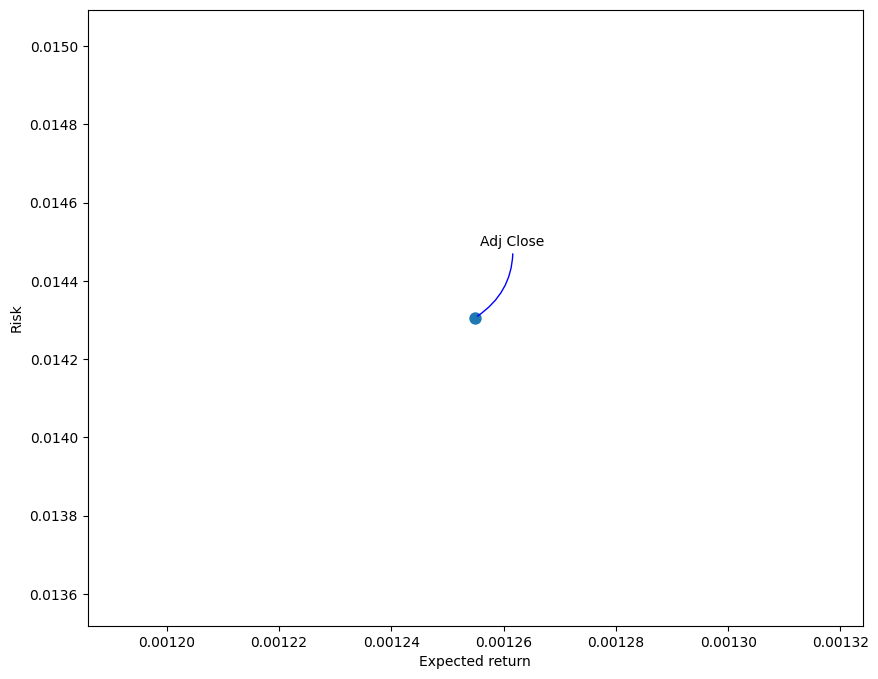

In [26]:
area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(risk_df.mean(), risk_df.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(risk_df, risk_df.mean(), risk_df.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

<hr>

# **Step 7 - Working with the training and testing data**

In [27]:
data = yf.download("AAPL", start = "2014-01-01", end = datetime.now())

[*********************100%***********************]  1 of 1 completed


In [28]:
data.head()
data.columns = [f"{col[0]}" for col in data.columns]

In [29]:
fig = px.line(data, x = data.index, y = "Close", title = "Close Price for Apple in Dollars ($)")
fig.show()

**Creating a seperate dataframe that only has Close columns so that we can focus on that only**

In [30]:
df_close = data[["Close"]]

In [31]:
len(df_close)

2766

**Grabbing the number of rows that we need to train**

In [32]:
train_len = int(np.ceil(len(df_close) * 0.95))

In [33]:
train_len

2628

<hr>

# **Step 8 - Working with the predictions on the data**

* **Scaling the values**
  * **It's should to be done seperately on the training and testing data, but since we are practicing right now it's fine. Otherwise look-ahead-bias issue can be there**

In [34]:
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(df_close)

In [35]:
# commonly we would have done something like this
# train_data = scaler.fit_transform(train_data)

In [36]:
pd.DataFrame(data_scaled, columns = ["Scaled Data"])

,Scaled Data
0,0.007900
1,0.006101
2,0.006538
3,0.005962
4,0.006468
...,...
2761,0.981217
2762,0.984451
2763,0.996600
2764,1.000000


# **Step 9 - Splitting the data into training and testing**

* **We need to create the training data**

In [37]:
train_data = data_scaled[0:train_len, :]

* **Splitting the data into training and testing part**

In [38]:
x_train, y_train = [], []

In [39]:
# This loop is creating sequences of 60 data points each from the training data.
# Each sequence represents the past 60 values.
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60 : i, 0])
  y_train.append(train_data[i, 0])


In [40]:
# Converting the both in array format for usability
x_train, y_train = np.array(x_train), np.array(y_train)

In [41]:
# Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# **LSTM Neural Network**

# **Step 10 - Working with Neural Net**

In [42]:
model = Sequential()
model.add(LSTM(128,
               return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(30))
model.add(Dense(1))

**Compilation**

In [43]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

**Fitting the data**

In [44]:
model.fit(x_train, y_train, batch_size = 1, epochs = 2)

Epoch 1/2
2568/2568 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0027
Epoch 2/2
2568/2568 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 4.8408e-04


**Testing data creation**

In [45]:
test_data = data_scaled[train_len - 60:, :]

* **Creating the subsets of testing**

In [46]:
x_test = []
y_test = df_close.values[train_len:, :]

* **Creating a sequence of testing data**

In [47]:
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [48]:
# Converting x_test to array
x_test = np.array(x_test)

In [49]:
# Reshaping for predictions
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

**Predictions**

In [50]:
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


**Evaluations**

In [51]:
RMSE = np.sqrt(np.mean((y_test - predictions)**2))

print(f"RMSE: {RMSE}")

RMSE: 4.497973737578853


# **Step 11 - Visualize**

In [52]:
# We have two different data's that is training and testing
train = df_close[ : train_len]

prediction_data = df_close[train_len: ]

prediction_data["Predictions"] = predictions

In [53]:
a = prediction_data["Close"].values

b = prediction_data["Predictions"].values

In [54]:
fig = px.line(train, x=train.index, y= "Close", title = "Final Analysis for Apple")
fig.add_scatter(x=prediction_data.index, y= a, name = "Actual")
fig.add_scatter(x=prediction_data.index, y= b, name = "Predictions")
fig.show()

In [55]:
prediction_data.head()

,Close,Predictions
Date,,
2024-06-12,213.070007,198.647446
2024-06-13,214.240005,205.384308
2024-06-14,212.490005,210.633926
2024-06-17,216.669998,212.591721
2024-06-18,214.289993,214.351974


In [56]:
def evaluate(y_test = y_test, prediction = predictions):
  mse = mean_squared_error(y_test, predictions)
  print("Mean squared error:", mse)
  mae = mean_absolute_error(y_test, predictions)
  print("Mean absolute error:", mae)
  r2 = r2_score(y_test, predictions)
  print("R-squared score:", r2)
  RMSE = np.sqrt(np.mean((y_test - predictions)**2))
  print(f"RMSE: {RMSE}")

In [57]:
evaluate()

Mean squared error: 20.231767743949078
Mean absolute error: 3.6970445937004643
R-squared score: 0.8307778528980461
RMSE: 4.497973737578853
